In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Data import CodonTable
import matplotlib.mlab as mlab

In [2]:
file = open("grantham.dist4", "r")
original = []
for line in file.readlines():
    original.append(line.replace("\n", "").split("\t"))
file.close()

In [3]:
original

[['A', 'A', '0'],
 ['A', 'C', '195'],
 ['A', 'D', '126'],
 ['A', 'E', '107'],
 ['A', 'F', '113'],
 ['A', 'G', '60'],
 ['A', 'H', '86'],
 ['A', 'I', '94'],
 ['A', 'K', '106'],
 ['A', 'L', '96'],
 ['A', 'M', '84'],
 ['A', 'N', '111'],
 ['A', 'P', '27'],
 ['A', 'Q', '91'],
 ['A', 'R', '112'],
 ['A', 'S', '99'],
 ['A', 'T', '58'],
 ['A', 'V', '64'],
 ['A', 'W', '148'],
 ['A', 'Y', '112'],
 ['C', 'A', '195'],
 ['C', 'C', '0'],
 ['C', 'D', '154'],
 ['C', 'E', '170'],
 ['C', 'F', '205'],
 ['C', 'G', '159'],
 ['C', 'H', '174'],
 ['C', 'I', '198'],
 ['C', 'K', '202'],
 ['C', 'L', '198'],
 ['C', 'M', '196'],
 ['C', 'N', '139'],
 ['C', 'P', '169'],
 ['C', 'Q', '154'],
 ['C', 'R', '180'],
 ['C', 'S', '112'],
 ['C', 'T', '149'],
 ['C', 'V', '192'],
 ['C', 'W', '215'],
 ['C', 'Y', '194'],
 ['D', 'A', '126'],
 ['D', 'C', '154'],
 ['D', 'D', '0'],
 ['D', 'E', '45'],
 ['D', 'F', '177'],
 ['D', 'G', '94'],
 ['D', 'H', '81'],
 ['D', 'I', '168'],
 ['D', 'K', '101'],
 ['D', 'L', '172'],
 ['D', 'M', '160'],

In [4]:
amino_acid = np.unique(np.array(original)[:, 0])
amino_acid

array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y'],
      dtype='<U3')

In [5]:
aa_distance = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for pair in original:
    aa_distance.loc[pair[0], pair[1]] = pair[2]
Grantham_distance = aa_distance.astype(int)
Grantham_distance

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0,195,126,107,113,60,86,94,106,96,...,111,27,91,112,99,58,64,148,500,112
C,195,0,154,170,205,159,174,198,202,198,...,139,169,154,180,112,149,192,215,500,194
D,126,154,0,45,177,94,81,168,101,172,...,23,108,61,96,65,85,152,181,500,160
E,107,170,45,0,140,98,40,134,56,138,...,42,93,29,54,80,65,121,152,500,122
F,113,205,177,140,0,153,100,21,102,22,...,158,114,116,97,155,103,50,40,500,22
G,60,159,94,98,153,0,98,135,127,138,...,80,42,87,125,56,59,109,184,500,147
H,86,174,81,40,100,98,0,94,32,99,...,68,77,24,29,89,47,84,115,500,83
I,94,198,168,134,21,135,94,0,102,5,...,149,95,109,97,142,89,29,61,500,33
K,106,202,101,56,102,127,32,102,0,107,...,94,103,53,26,121,78,97,110,500,85
L,96,198,172,138,22,138,99,5,107,0,...,153,98,113,102,145,92,32,61,500,36


In [6]:
Grantham_D = np.array(Grantham_distance)
Grantham_D

array([[  0, 195, 126, 107, 113,  60,  86,  94, 106,  96,  84, 111,  27,
         91, 112,  99,  58,  64, 148, 500, 112],
       [195,   0, 154, 170, 205, 159, 174, 198, 202, 198, 196, 139, 169,
        154, 180, 112, 149, 192, 215, 500, 194],
       [126, 154,   0,  45, 177,  94,  81, 168, 101, 172, 160,  23, 108,
         61,  96,  65,  85, 152, 181, 500, 160],
       [107, 170,  45,   0, 140,  98,  40, 134,  56, 138, 126,  42,  93,
         29,  54,  80,  65, 121, 152, 500, 122],
       [113, 205, 177, 140,   0, 153, 100,  21, 102,  22,  28, 158, 114,
        116,  97, 155, 103,  50,  40, 500,  22],
       [ 60, 159,  94,  98, 153,   0,  98, 135, 127, 138, 127,  80,  42,
         87, 125,  56,  59, 109, 184, 500, 147],
       [ 86, 174,  81,  40, 100,  98,   0,  94,  32,  99,  87,  68,  77,
         24,  29,  89,  47,  84, 115, 500,  83],
       [ 94, 198, 168, 134,  21, 135,  94,   0, 102,   5,  10, 149,  95,
        109,  97, 142,  89,  29,  61, 500,  33],
       [106, 202, 101,  

In [7]:
scaled_aa = pd.read_table("aa-scaled.txt", index_col=0)
scaled_aa

,polarity,hydropathy,volume,iso.electricity
aa,,,,
X,-1.5993,1.6720,-1.5833,-2.6562
A,-0.0796,0.6402,-0.9414,0.1086
R,0.7182,-1.3910,0.9842,2.3020
D,2.2000,-1.0686,-0.4652,-1.3798
N,1.0602,-1.0686,-0.4238,-0.1633
C,-0.9154,0.8659,-0.4445,-0.3199
E,2.0100,-1.0686,-1.4115,-1.1724
Q,0.5283,-1.0686,0.1767,-0.0527
G,0.2623,-0.0691,-1.5212,0.0948


In [8]:
aa_distance = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for aa1 in scaled_aa.index:
    for aa2 in scaled_aa.index:
        Eu_dist = np.sqrt(np.square(scaled_aa.loc[aa1, 'polarity'] - scaled_aa.loc[aa2, 'polarity']) + np.square(scaled_aa.loc[aa1, 'hydropathy'] - scaled_aa.loc[aa2, 'hydropathy']))
        aa_distance.loc[aa1, aa2] = Eu_dist
Scaled_distance = aa_distance
Scaled_distance

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0.000000,0.865738,2.848960,2.699338,0.825502,0.787402,1.697582,1.180860,1.944808,1.025856,...,2.054055,1.106688,1.813709,2.182260,0.859562,0.820207,0.939063,1.107018,1.836872,1.169847
C,0.865738,0.000000,3.667152,3.507172,0.123008,1.503729,2.290876,0.646019,2.683128,0.420919,...,2.765011,1.488288,2.413827,2.786081,1.477959,1.237735,0.626800,1.106674,1.057126,1.246216
D,2.848960,3.667152,0.000000,0.190000,3.655782,2.180294,1.750373,4.015432,1.113530,3.874312,...,1.139800,2.507580,1.671700,1.516467,2.263669,2.593786,3.750777,3.079786,4.684610,2.973342
E,2.699338,3.507172,0.190000,0.000000,3.499404,2.013320,1.560699,3.871742,0.925940,3.725182,...,0.949800,2.323801,1.481700,1.331424,2.089557,2.416572,3.610549,2.897421,4.531880,2.789196
F,0.825502,0.123008,3.655782,3.499404,0.000000,1.509495,2.326247,0.549409,2.692945,0.324620,...,2.781194,1.543455,2.448889,2.822469,1.499922,1.281817,0.505713,1.195418,1.039424,1.330710
G,0.787402,1.503729,2.180294,2.013320,1.509495,0.000000,0.922577,1.948076,1.183839,1.769964,...,1.278923,0.627398,1.034290,1.398308,0.199285,0.503277,1.721455,1.038389,2.548918,0.993145
H,1.697582,2.290876,1.750373,1.560699,2.326247,0.922577,0.000000,2.816363,0.649113,2.619571,...,0.615543,0.856663,0.122991,0.496334,0.845968,1.057126,2.612406,1.424128,3.346531,1.293995
I,1.180860,0.646019,4.015432,3.871742,0.549409,1.948076,2.816363,0.000000,3.122609,0.225700,...,3.226081,2.070111,2.937566,3.311553,1.973851,1.796676,0.282938,1.744822,0.739679,1.879717
K,1.944808,2.683128,1.113530,0.925940,2.692945,1.183839,0.649113,3.122609,0.000000,2.951280,...,0.165618,1.404325,0.592260,0.615036,1.216082,1.522609,2.883130,1.981008,3.732266,1.867923
L,1.025856,0.420919,3.874312,3.725182,0.324620,1.769964,2.619571,0.225700,2.951280,0.000000,...,3.048639,1.857010,2.741513,3.115678,1.782030,1.588134,0.295540,1.519674,0.819043,1.655329


In [9]:
Scaled_D = np.array(Scaled_distance)
Scaled_D

array([[ 0.        ,  0.86573791,  2.84896009,  2.69933799,  0.82550243,
         0.78740212,  1.69758182,  1.18085952,  1.94480811,  1.02585615,
         0.64670712,  2.05405489,  1.10668805,  1.81370887,  2.1822599 ,
         0.85956203,  0.82020729,  0.93906273,  1.10701827,  1.83687216,
         1.16984728],
       [ 0.86573791,  0.        ,  3.66715249,  3.507172  ,  0.12300833,
         1.50372946,  2.29087584,  0.64601858,  2.68312837,  0.4209188 ,
         0.27104533,  2.76501096,  1.4882883 ,  2.41382682,  2.78608086,
         1.47795861,  1.23773476,  0.62680017,  1.10667432,  1.05712649,
         1.24621565],
       [ 2.84896009,  3.66715249,  0.        ,  0.19      ,  3.65578171,
         2.18029391,  1.75037315,  4.01543212,  1.11352983,  3.87431213,
         3.40440589,  1.1398    ,  2.50757997,  1.6717    ,  1.51646728,
         2.26366924,  2.59378611,  3.75077746,  3.07978557,  4.68460979,
         2.97334202],
       [ 2.69933799,  3.507172  ,  0.19      ,  0.        

In [10]:
K = np.random.random((len(amino_acid), 64))
pd.DataFrame(K, index=amino_acid, columns=np.arange(64))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
A,0.419431,0.418302,0.636021,0.761689,0.124068,0.252044,0.403426,0.885964,0.904851,0.003289,...,0.532978,0.212130,0.677925,0.798897,0.197902,0.302419,0.162346,0.203097,0.708717,0.528309
C,0.553489,0.925989,0.671280,0.090370,0.164690,0.509850,0.904130,0.110589,0.238244,0.092923,...,0.300805,0.342415,0.946678,0.441546,0.871552,0.866552,0.108227,0.978321,0.597702,0.438271
D,0.159585,0.851268,0.697552,0.805229,0.246676,0.746538,0.433508,0.608408,0.070711,0.664916,...,0.716688,0.979812,0.569382,0.500614,0.778693,0.103931,0.987185,0.652824,0.270808,0.805387
E,0.528946,0.108210,0.895524,0.794295,0.510424,0.506888,0.395472,0.685338,0.673508,0.707104,...,0.026219,0.051844,0.780945,0.313380,0.638633,0.543128,0.063363,0.257950,0.997228,0.361757
F,0.499680,0.255681,0.467369,0.564152,0.025204,0.965002,0.400785,0.835326,0.909616,0.912827,...,0.623976,0.384289,0.342008,0.393775,0.135662,0.885382,0.073146,0.147023,0.191146,0.589840
G,0.938846,0.346183,0.091509,0.449215,0.227478,0.265716,0.193224,0.003653,0.465515,0.369072,...,0.340700,0.287065,0.698524,0.156930,0.106862,0.998491,0.511372,0.877224,0.579620,0.067382
H,0.658385,0.406204,0.738824,0.196058,0.477203,0.611771,0.456911,0.915646,0.244414,0.632752,...,0.634619,0.254948,0.730744,0.676966,0.138922,0.256293,0.638521,0.817876,0.974846,0.513876
I,0.150374,0.169971,0.201704,0.888390,0.456864,0.201371,0.084208,0.969044,0.240559,0.679537,...,0.105290,0.256119,0.277307,0.503433,0.368419,0.230366,0.527318,0.256243,0.323252,0.310453
K,0.604056,0.153253,0.549218,0.951947,0.810250,0.511202,0.426786,0.087916,0.885924,0.594197,...,0.299750,0.727138,0.204878,0.652162,0.411638,0.434587,0.672599,0.797245,0.700503,0.732478
L,0.676221,0.685417,0.108570,0.389025,0.290881,0.793374,0.279808,0.214339,0.062446,0.918037,...,0.956226,0.619431,0.860411,0.808975,0.621268,0.355540,0.640252,0.682184,0.988658,0.235738


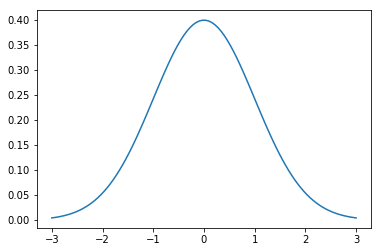

In [11]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

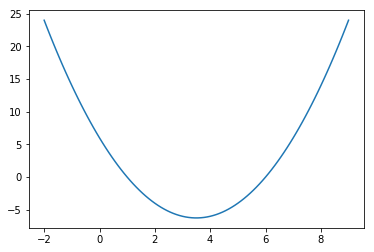

In [12]:
a = 1
x = np.linspace(-2, 9, 100)
plt.plot(x, a * (x - 1) * (x - 6))

plt.show()

In [23]:
def N_penalization(row_summation):
    # mean is 3.5 to which the normal distribution is symetric
    mu = (1 + 6) / 2
    # standard deviation is 1.25 to make sure 95% SGC are within the area surrounded by the curve & x-axis
    sigma = 1.25
    # the probability density function curve is constrained to be 0 when x = 1 or 6 for penalization
    y_shift = mlab.normpdf(1, mu, sigma)
    variance = np.square(sigma)
    x = np.linspace(mu-3*variance,mu+3*variance, 100)
        
    # visualize transformed normal distribution
    #plt.plot(x,-mlab.normpdf(x, mu, sigma) + y_shift)
    #plt.plot([mu, mu], [-0.31, 0.1], '-k')
    #plt.plot([0, 7], [0, 0], '--r')
    #plt.plot([1, 1], [-0.3, 0.1], '--r')
    #plt.plot([6, 6], [-0.3, 0.1], '--r')
    #plt.show()
    return(-mlab.normpdf(row_summation, mu, sigma) + y_shift)
N_penalization(1)

0.0

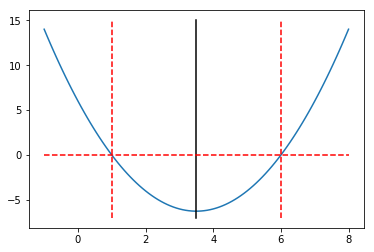

In [14]:
def Q_penalization():
    a = 1
    x = np.linspace(-1, 8, 100)
    
    plt.plot(x, a * (x - 1) * (x - 6))
    plt.plot([3.5, 3.5], [-7, 15], '-k')
    plt.plot([-1, 8], [0, 0], '--r')
    plt.plot([1, 1], [-7, 15], '--r')
    plt.plot([6, 6], [-7, 15], '--r')
    plt.show()
Q_penalization()

In [20]:
aa_num = 21
cd_num = 64
def I(i):
    if i + 1 > cd_num - 1:
        return(i - 1, 0)
    elif i - 1 < 0:
        return(cd_num - 1, i + 1)
    else:
        return(i - 1, i + 1)

In [24]:
V = np.copy(K)
dp = Grantham_D.max()
T = 4

In [43]:
E = 0
for i in range(cd_num):
    Uxi_exp_accum = 0
    Uxi_ls = []
    for X in range(aa_num):
        dist = 0
        for Y in range(aa_num):
            dist += Grantham_D[X, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
        Uxi = -dp * N_penalization(sum(V[X, :])) - dist
        
        Uxi_ls.append(Uxi)
        Uxi_exp_accum += np.exp(Uxi / T)
    
    # update Vxi    
    for X in range(aa_num):
        V[X, i] = np.exp(Uxi_ls[X] / T) / Uxi_exp_accum
        
        # calculate E
        E += - V[X, i] * Uxi_ls[X]
E

2242.9321432377901

In [44]:
v_state = pd.DataFrame(np.round(V), index=amino_acid).astype(int)
v_state

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
v_state.sum(axis=1)

A     0
C     0
D     0
E     0
F     0
G     0
H     7
I     6
K     0
L     7
M     7
N     0
P     0
Q     8
R     0
S     0
T    19
V     7
W     0
X     0
Y     0
dtype: int64

In [27]:
Uxi_ls

[-199.24307277455372,
 -331.17975651879146,
 -145.17952293726773,
 -79.041991077357807,
 -246.62967796166339,
 -195.04255463402248,
 -60.56914634229561,
 -228.27029940254491,
 -119.44326428166174,
 -240.49979007983055,
 -216.59299561649817,
 -115.65457129779639,
 -170.66773660647917,
 -26.776273079764508,
 -101.10290635784264,
 -159.41724248273908,
 -106.78400490695782,
 -207.08446029412681,
 -274.86829293547464,
 -1018.4302059720832,
 -210.81208398010108]

In [135]:
V = np.copy(K)
T = 4
dp = 1

In [133]:
E = 0
for i in range(cd_num):
    Uxi_exp_accum = 0
    Uxi_ls = []
    for X in range(aa_num):
        dist = 0
        for Y in range(aa_num):
            dist += Grantham_D[X, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
        Uxi = dp * (sum(V[X, :]) - 1) * (sum(V[X, :]) - 6) - dist
        
        Uxi_ls.append(Uxi)
        Uxi_exp_accum += np.exp(Uxi / T)
    
    # update Vxi    
    for X in range(aa_num):
        V[X, i] = np.exp(Uxi_ls[X] / T) / Uxi_exp_accum
        
        # calculate E
        E += - V[X, i] * Uxi_ls[X]
E

-1286208.0

In [136]:
constraint = dp * (sum(V[X, :]) - 1) * (sum(V[X, :]) - 6)
constraint

651.56603072637029

In [138]:
for i in range(cd_num):
    dist = 0
    for Y in range(aa_num):
        dist += Scaled_D[1, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
    print(dist)

33.3491200907
30.2193539027
29.8584661231
29.0692770158
26.5942262433
30.0638034715
31.726549386
33.260986227
31.7265016186
33.5232994274
26.4122200837
30.6811765874
28.0333406846
31.6254698559
33.0598741247
31.6698974844
33.8791646783
30.1090229848
35.6750419075
30.2493132387
31.1149508263
36.3304192383
30.113687618
34.4285347772
34.1169559817
30.5188624761
30.2473011159
28.5088092679
25.2355408722
25.4617486809
28.1566723977
30.9596798169
27.2757568307
35.2985693585
27.6662480279
34.5683084447
34.6202506402
32.9918035946
33.9195467176
35.0442532942
33.863404761
34.7222614703
36.4904481268
30.1643354155
28.3305768322
26.9004125963
25.5980591886
26.3460639045
34.9240946849
26.782627196
32.3560064235
30.6442332502
28.2598563962
32.6421187876
28.3823928899
31.6944954565
31.4447921093
31.3980225553
36.8173672997
26.7553060675
32.7059435021
26.8964897369
28.9945953217
31.4396150848


In [62]:
I(2)

(1, 3)

In [506]:
V_matrix = pd.DataFrame(np.round(V), index=amino_acid).astype(int)
V_matrix

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [507]:
V_matrix.sum(axis=1)

A    0
C    0
D    0
E    6
F    0
G    0
H    6
I    6
K    6
L    0
M    0
N    7
P    6
Q    6
R    6
S    0
T    7
V    6
W    0
X    0
Y    0
dtype: int64